# 單元6 機器學習概要

機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

這種學函數的方法, 又可以分為:

* supervised learning
* unsupervised learning 

其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

今天我們就來介紹最最基本的方式, 一個是 SVM, 一個是 K-Means。

照例是讀入我們的標準套件。

## 6-1 用 SVM 來做分類

#### 先做個簡單的資料

假設我們有四個點, 有兩個類別。

我們要畫圖時, 需要把 $x$ 中點的 $x$-座標, $y$-座標分成兩個 list (array)。記得我們要 $x$ 全部是這樣叫出來的。

#### 畫出已知分類狀態

而 $x$ 中前面的元素 ($x$-座標) 是這樣。當然 $y$-座標也是類似方法叫出來。

於是我們就能畫圖, `s=50` 是設定點的大小, `c=y` 就是指定顏色, 不同類別不同色。

#### 打開一台 SVM 分類機

支持向量機, 大家都用英文縮寫 SVM 稱呼。是一個用曲線把資料分隔的辦法。在高維度的時候自然就是曲面 (超曲面) 分隔資料的方法。

打開一台機器, 就像打開「迴歸機一樣」。

學習! 這樣就做完了!!

#### 預測結果

先來看看我們之前用來學的有沒有做對, 你會發現用法和以前迴歸是完全一樣的。

### 【技巧】視覺化成果之一

再來視覺化一下我們的成果, 這次我們用不太一樣的方式, 但技巧都學過了!

### 【技巧】視覺化成果之二

我們的「傳統手法」。

## 5-2 生個「像樣點」的假數據*

剛剛我們隨便做的數據又少、又不像真的。不如我們就來用 `sklearn` 生一些「像真的一樣」的數據。

#### 用 `make_classification` 製造分類數據

In [16]:
from sklearn.datasets import make_classification

開始你只需知道, `n_features` 是指 $x$ 的參數要幾個, `n_classes` 是你要分成幾類。

In [17]:
x, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, 
                           n_clusters_per_class=1, n_classes=3,
                           random_state=9487)

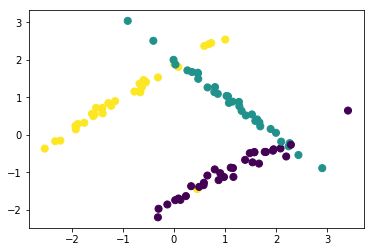

In [18]:
plt.scatter(x[:,0], x[:,1], s=50, c=y)

#### 訓練方式其實是一樣的!

In [19]:
clf = SVC()

In [20]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 來看預測的結果

這裡看看我們可愛的 SVM, 把我們訓練資料學得怎麼樣。

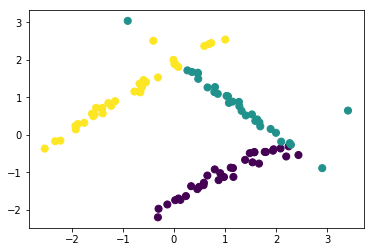

In [21]:
plt.scatter(x[:,0], x[:,1], s=50, c=clf.predict(x))

你有沒有看出哪個分錯了? 我是看不出來。所以我們用個簡單方式, 如果沒錯的會用一個顏色, 錯了就用其他顏色表示。

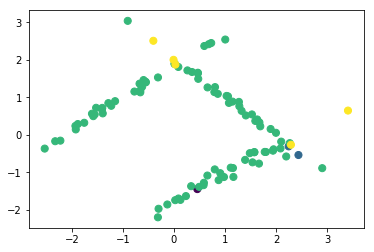

In [22]:
plt.scatter(x[:,0], x[:,1], s=50, c=clf.predict(x) - y)

當然再畫個我們最愛的...

In [23]:
x1, x2 = np.meshgrid(np.arange(-4,4,0.02), np.arange(-3,4,0.02))
X = np.c_[x1.ravel(),x2.ravel()]
Z = clf.predict(X)

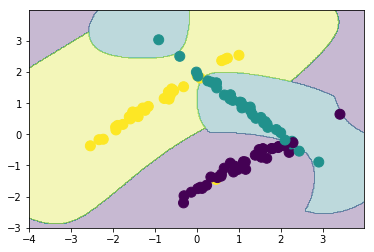

In [24]:
z = Z.reshape(x1.shape)

plt.contourf(x1, x2, z, alpha=0.3)
plt.scatter(x[:,0], x[:,1], s=100, c=y)

## 5-3 來分分鳶尾花

鳶尾花 (Iris)  數據庫是很有名的資料, 就是試著以一朵鳶尾花花萼、花瓣的大小來分出是哪個的大小來分出是哪個亞種的鳶尾花。

#### 看數據庫的說明

一樣可以用

    print(iris.DESCR)
    
看數據庫說明。我們這裡看看 features 有哪些?

有四個 features: 花萼長度、寬度和花瓣長度、寬度

#### 準備 inputs 和 outputs

為了表示我們很神 (事實上只是好畫圖), 我們只用兩個 features  (花萼長度、寬度)。

用 80% 當訓練資料, 留 20% 看我們做得如何?

#### 畫圖出來感受一下

#### 開個分類機、訓練

#### 看看有沒有不準的?

#### 畫出結果

## 5-4 K-Means 會自動分類!

我們介紹一個很好用的 unsupervised learning, 叫 K-Means。我們可以指定把我們資料分成幾類, 然後它就會快速分好!

#### 隨便生個 100 點

#### 製做一個 K-Means 分類器

和前面 SVM 很像。

記得要告訴 K-Means 要分成幾類 (我們這裡是 3 類)。

#### 訓練好的結果

訓練好的結果, 在神秘的 `labels_` 之下。

#### 畫完整分類

和以前一樣, 未來新的資料進來, 我們訓練好的也可以再做分類。